In [1]:
pip install pandas mlxtend


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
from mlxtend.frequent_patterns import apriori, association_rules
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv('processed_dataset.csv')
df_encoded = pd.get_dummies(df)

for column in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = df_encoded[column].mean()
    df_encoded[column] = (df_encoded[column] > mean_value).astype(int)

In [4]:

frequent_itemsets = apriori(df_encoded, min_support=0.5, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

sorted_itemsets = frequent_itemsets.sort_values(by=['length', 'support'], ascending=[True, False])

print(sorted_itemsets)

for length in sorted_itemsets['length'].unique():
    print(f"\nFrequent Itemsets of length {length}:")
    print(sorted_itemsets[sorted_itemsets['length'] == length])

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display association rules
print("\nAssociation Rules:")
for index, rule in association_rules_df.iterrows():
    print("Rule:", rule['antecedents'], "->", rule['consequents'])
    print("Support:", rule['support'])
    print("Confidence:", rule['confidence'])
    print("-----------------------------")


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                           itemsets  length
0        1.0                                     (Ad Supported)       1
3   0.995536                                     (Currency_USD)       1
4   0.846429                        (Rating Category_Excellent)       1
2   0.598214                                   (Avarage Rating)       1
1     0.5375                                           (Rating)       1
7   0.995536                       (Currency_USD, Ad Supported)       2
8   0.846429          (Rating Category_Excellent, Ad Supported)       2
12  0.841964          (Currency_USD, Rating Category_Excellent)       2
6   0.598214                     (Avarage Rating, Ad Supported)       2
11  0.598214                     (Currency_USD, Avarage Rating)       2
5     0.5375                             (Rating, Ad Supported)       2
10    0.5375                (Rating, Rating Category_Excellent)       2
9   0.533036                             (Rating, Currency_USD) 

In [5]:
# # Load and preprocess the data
# # df = pd.read_csv('/path/to/your/data.csv')
# # Example: Remove non-numeric columns and standardize data
# # df_encoded = pd.get_dummies(df)
# # scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_encoded)
# # PCA to find optimal number of components
# pca = PCA()
# df_pca = pca.fit_transform(df_scaled)
# explained_variance = np.cumsum(pca.explained_variance_ratio_)
# plt.plot(explained_variance)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA Explained Variance')
# plt.show()

# # Select optimal number of components (e.g., 5 for this example)
# pca = PCA(n_components=5)
# df_pca = pca.fit_transform(df_scaled)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

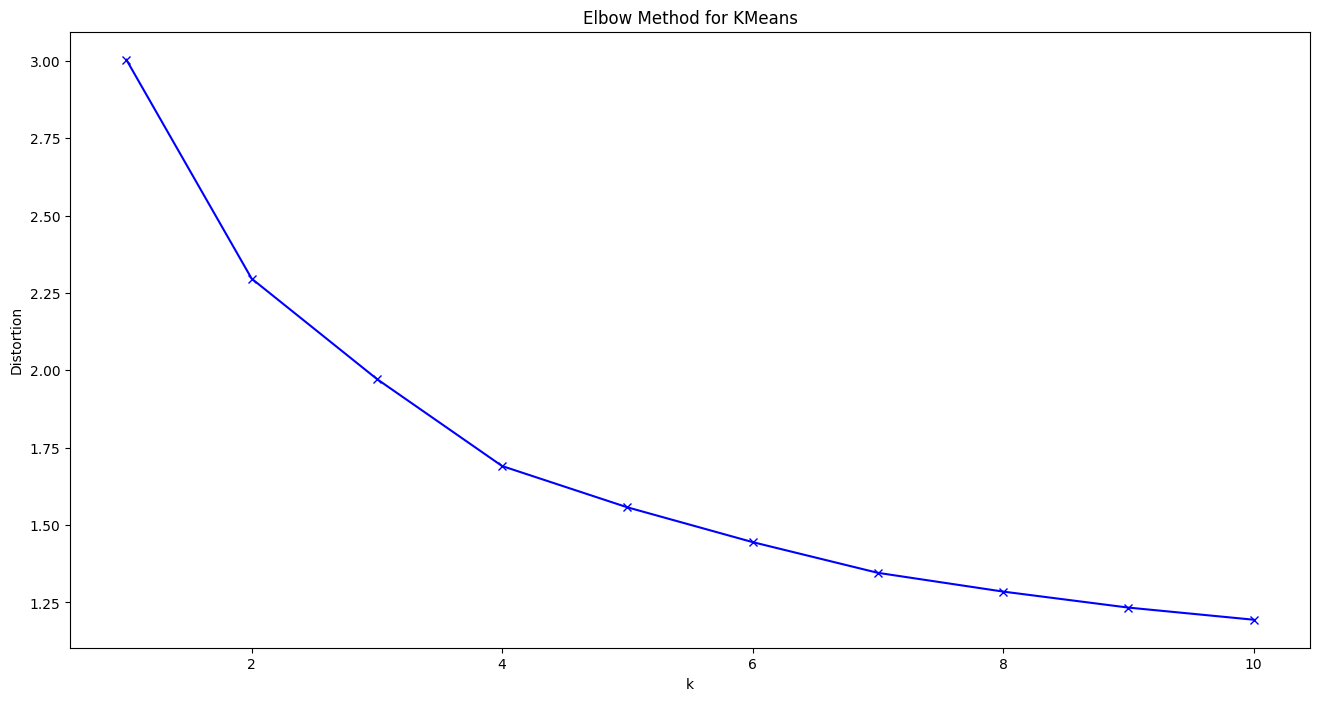

In [6]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_scaled)

def plot_elbow_method(X, title='Elbow Method'):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        
    plt.figure(figsize=(16, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title(title)
    plt.show()

plot_elbow_method(X_pca, 'Elbow Method for KMeans')


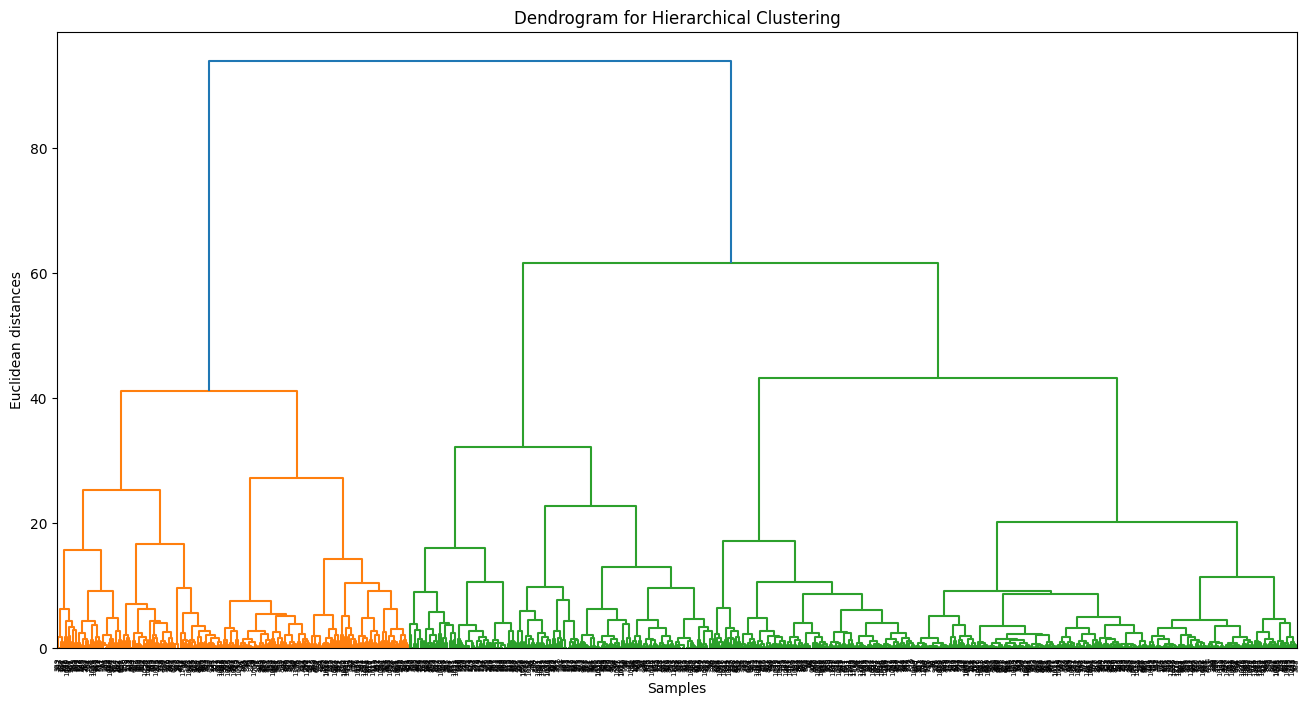

In [7]:

plt.figure(figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

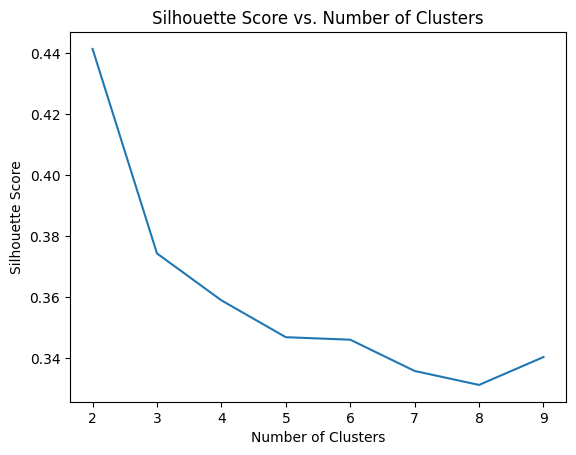

In [8]:

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
# Optimal number of clusters using Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


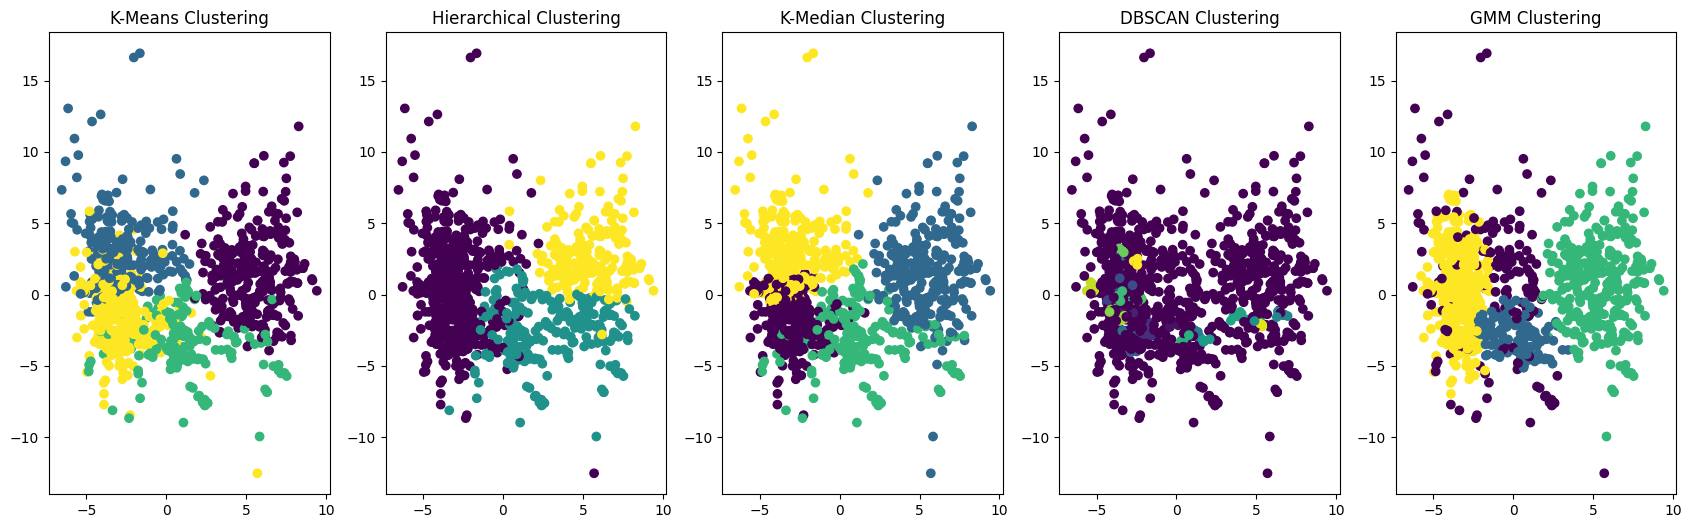

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
n_clusters =4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_pca)

def k_median_clustering(X, n_clusters, max_iter=300):
    np.random.seed(42)
    initial_medoids_idx = np.random.choice(len(X), n_clusters, replace=False)
    medoids = X[initial_medoids_idx]

    for _ in range(max_iter):
        distances = cdist(X, medoids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        new_medoids = np.array([np.median(X[labels == i], axis=0) for i in range(n_clusters)])

        if np.all(new_medoids == medoids):
            break
        medoids = new_medoids

    return labels

kmed_labels = k_median_clustering(df_pca, n_clusters=n_clusters)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(df_pca)

plt.figure(figsize=(21, 6))

plt.subplot(1, 5, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 5, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1, 5, 3)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmed_labels, cmap='viridis')
plt.title('K-Median Clustering')

plt.subplot(1, 5, 4)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 5, 5)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')

plt.show()




C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


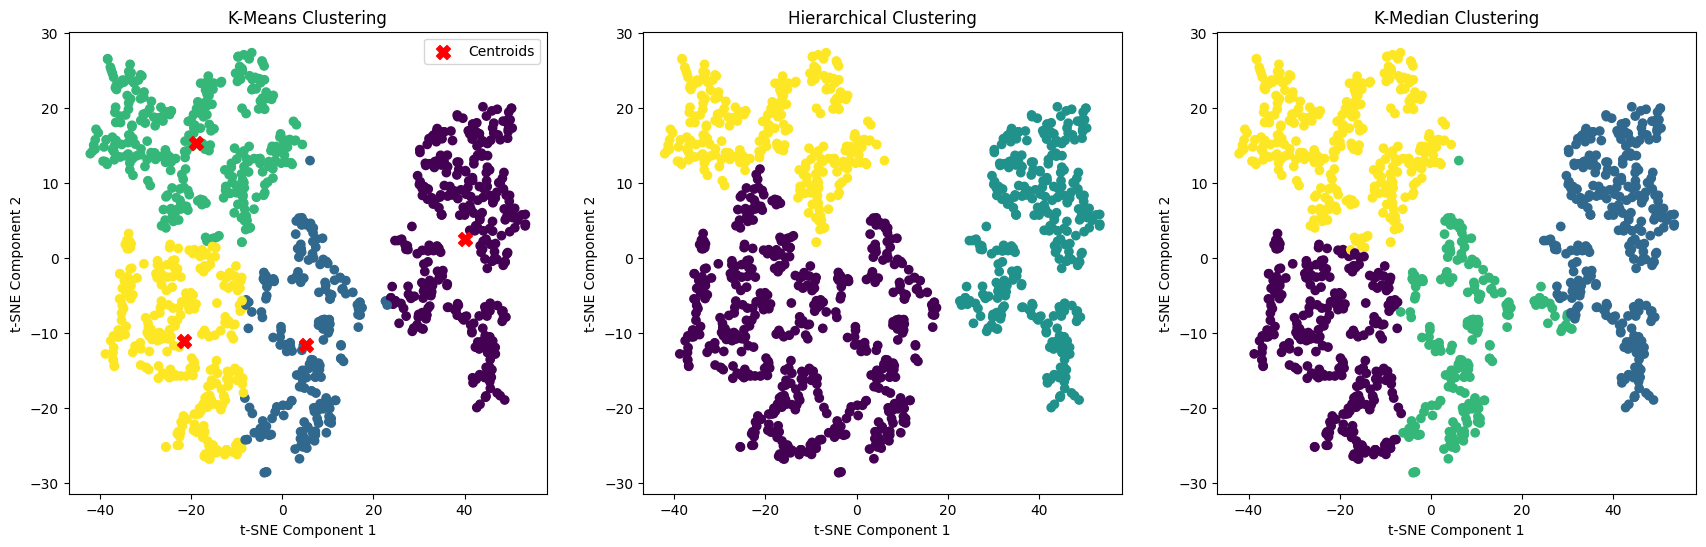

In [10]:
# Analyze clusters
df['KMeans_Cluster'] = kmeans_labels
df['Agg_Cluster'] = agg_labels
df['KMed_Cluster'] = kmed_labels
df['DBSCAN_Cluster'] = dbscan_labels
df['GMM_Cluster'] = gmm_labels

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_pca)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(df_tsne)
kmeans_centroids = kmeans.cluster_centers_

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_tsne)

kmed_labels = k_median_clustering(df_tsne, n_clusters=n_clusters)


plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.subplot(1, 3, 3)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kmed_labels, cmap='viridis')
plt.title('K-Median Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


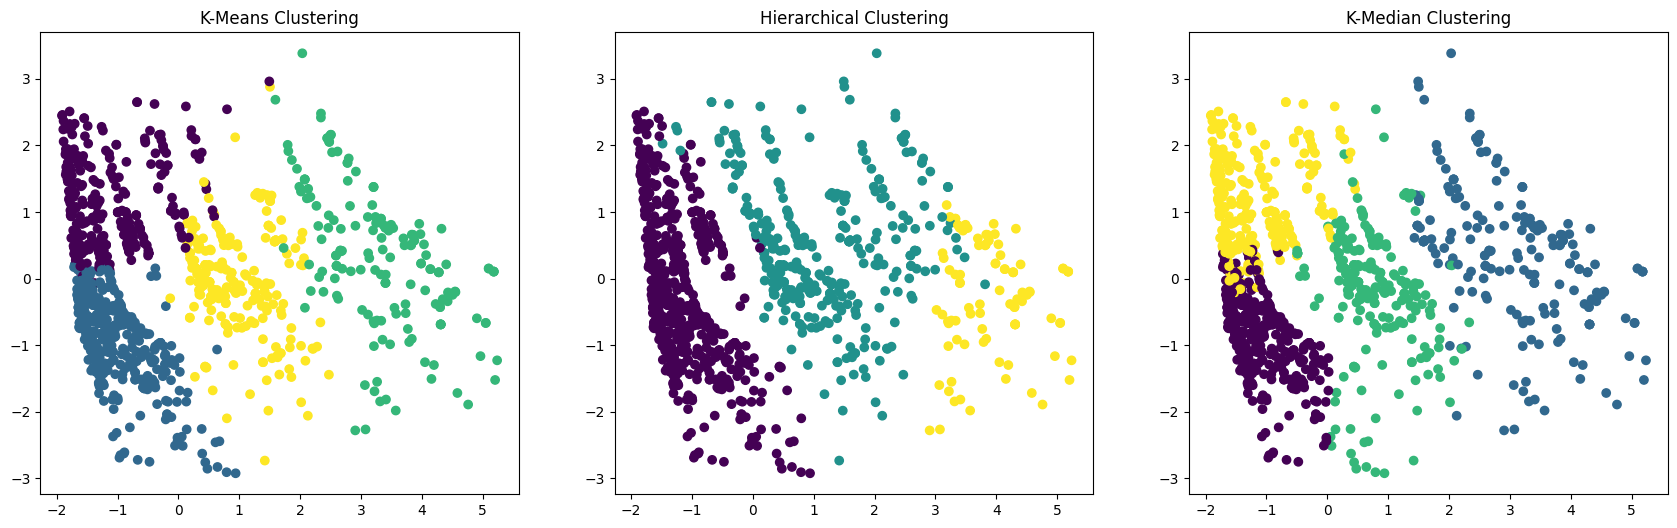

,App,Genres,Current Ver,App Id,Rating Count,Minimum Installs,Currency,Minimum Android,Developer Id,Released,...,Installs_normalized,Reviews Per Install,Avarage Rating,Install Range,Rating Category,KMeans_Cluster,Agg_Cluster,KMed_Cluster,DBSCAN_Cluster,GMM_Cluster
0,Garden Coloring Book,Art & Design,2.9.2,com.eyewind.colorfit.garden,16599.0,1000000.0,USD,4.1,Colorfit,1-Apr-16,...,0.001000,0.009690,1.713003,100k-1M,Excellent,1,0,0,-1,1
1,Tattoo Name On My Photo Editor,Art & Design,3.8,com.fashion.tattoo.name.my.photo.editor,50147.0,10000000.0,USD,4.2,iDroid+Solution,10-Mar-17,...,0.010000,0.003255,1.540401,1M-10M,Excellent,2,1,1,-1,2
2,Mandala Coloring Book,Art & Design,1.0.4,com.artiomapps.mandalacoloring,16.0,5000.0,USD,4.4,ArtiomApps,20-Apr-20,...,0.000052,0.433500,0.007382,0-10k,Excellent,1,0,0,-1,1
3,Mandala Coloring Book,Art & Design,1.0.4,com.eyewind.colorfit.mandala,76890.0,10000000.0,USD,4.1,Colorfit,21-Jun-16,...,0.005050,0.001646,4.672176,1M-10M,Excellent,3,1,1,-1,2
4,Mandala Coloring Book,Art & Design,1.0.4,com.piupiuapps.coloringmandala3,4200.0,500000.0,USD,4.1,Piu+Piu+Apps,28-Jan-19,...,0.000300,0.006366,1.319510,100k-1M,Excellent,1,0,0,0,1


In [11]:


# Selecting relevant numeric columns
selected_columns = [
    'Rating Count_normalized', 'Minimum Installs_normalized', 'Reviews_normalized',
    'Size_normalized', 'Installs_normalized', 'trend'
]
df_selected = df[selected_columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_pca)

def k_median_clustering(X, n_clusters, max_iter=300):
    np.random.seed(42)
    initial_medoids_idx = np.random.choice(len(X), n_clusters, replace=False)
    medoids = X[initial_medoids_idx]

    for _ in range(max_iter):
        distances = cdist(X, medoids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        new_medoids = np.array([np.median(X[labels == i], axis=0) for i in range(n_clusters)])

        if np.all(new_medoids == medoids):
            break
        medoids = new_medoids

    return labels

kmed_labels = k_median_clustering(df_pca, n_clusters=4)

# Visualization of clustering results
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmed_labels, cmap='viridis')
plt.title('K-Median Clustering')

plt.show()

# Analyze clusters
df['KMeans_Cluster'] = kmeans_labels
df['Agg_Cluster'] = agg_labels
df['KMed_Cluster'] = kmed_labels

df.head()


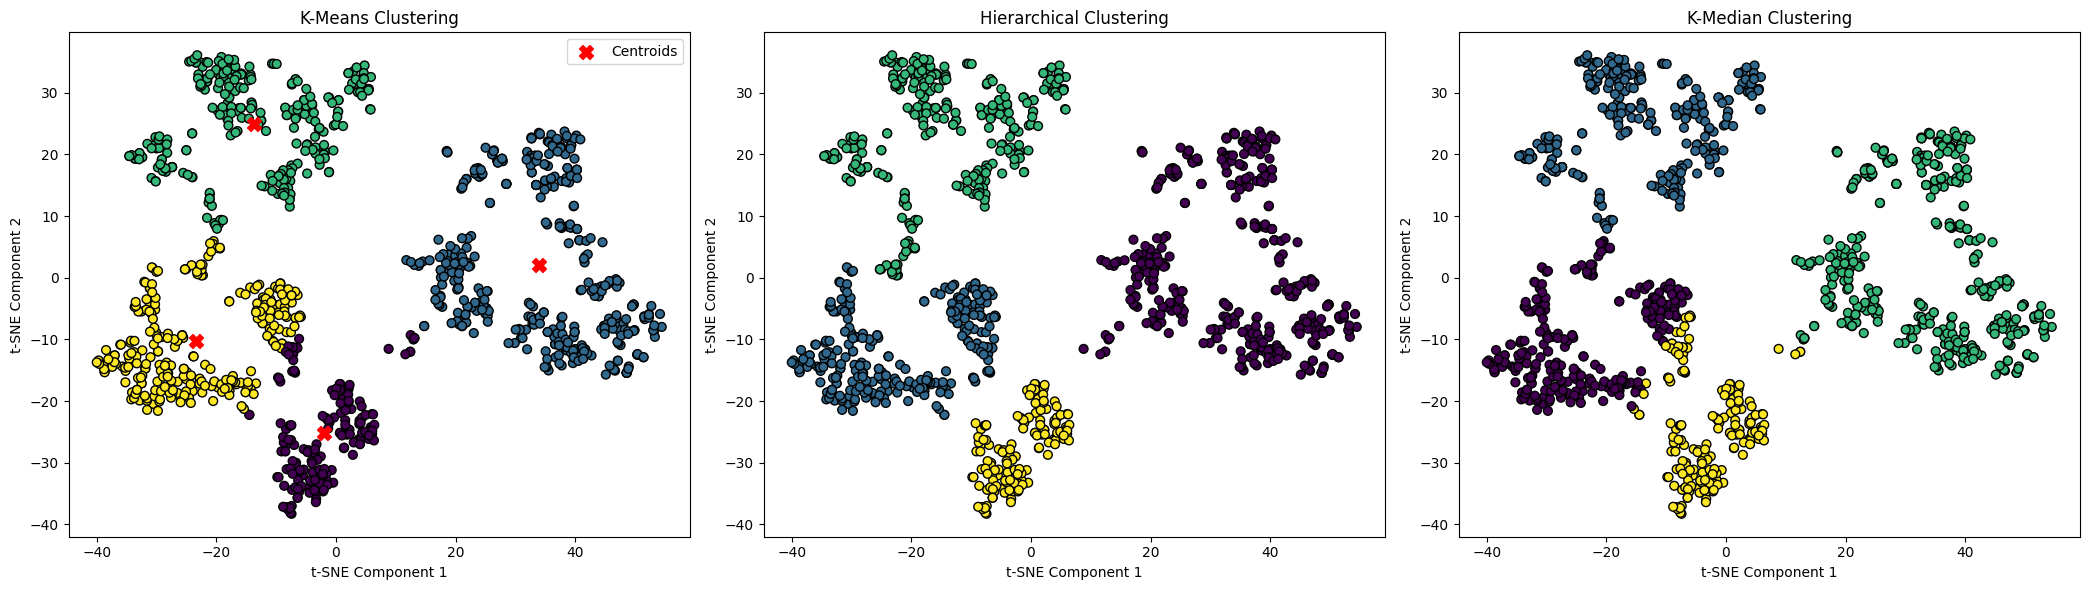

In [12]:

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

n_components = min(df_scaled.shape[0], df_scaled.shape[1], 22)  # Use 22 or fewer components

pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)


tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_pca)

kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++', n_init=10)
kmeans_labels = kmeans.fit_predict(df_tsne)
kmeans_centroids = kmeans.cluster_centers_

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_clustering.fit_predict(df_tsne)

def k_median_clustering(data, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42, method='pam')
    return kmedoids.fit_predict(data)

kmed_labels = k_median_clustering(df_tsne, n_clusters=4)

plt.figure(figsize=(21, 6))


plt.subplot(1, 3, 1)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=40)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k', s=40)
plt.title('Hierarchical Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')


plt.subplot(1, 3, 3)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kmed_labels, cmap='viridis', marker='o', edgecolor='k', s=40)
plt.title('K-Median Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


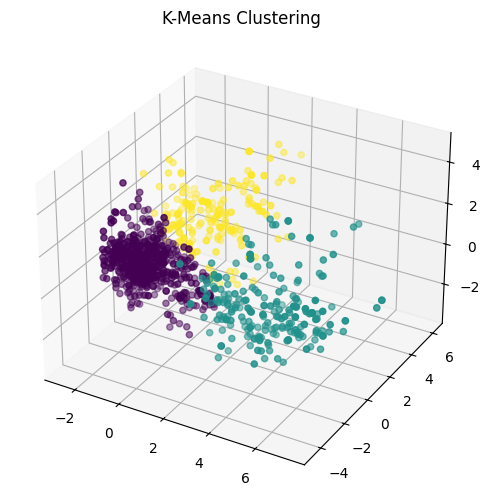

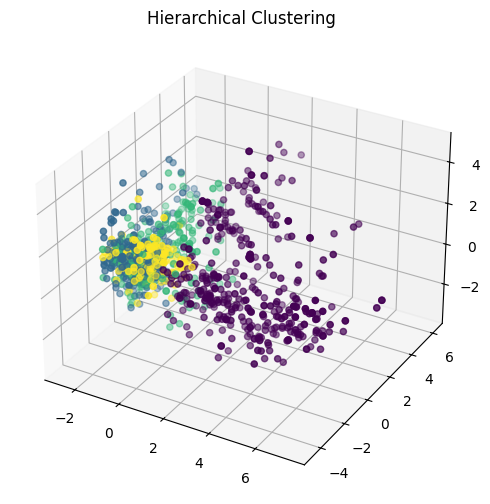

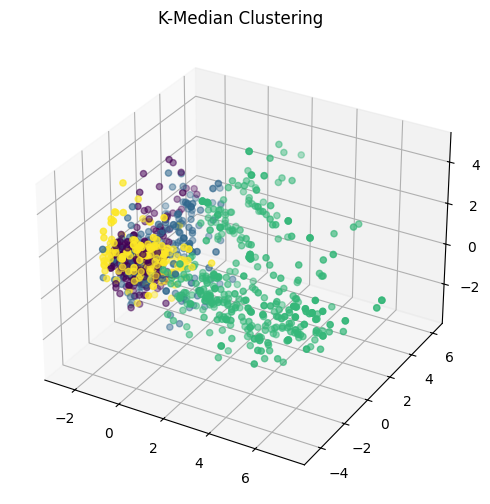

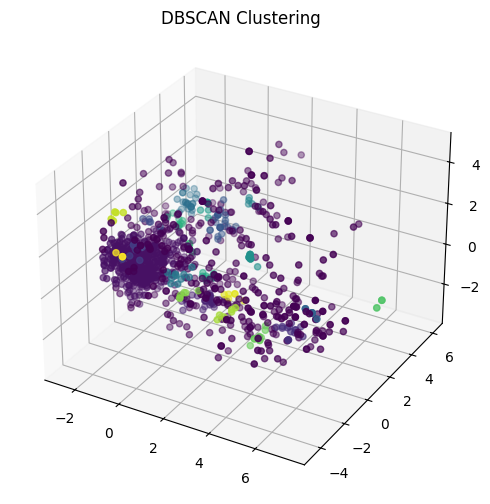

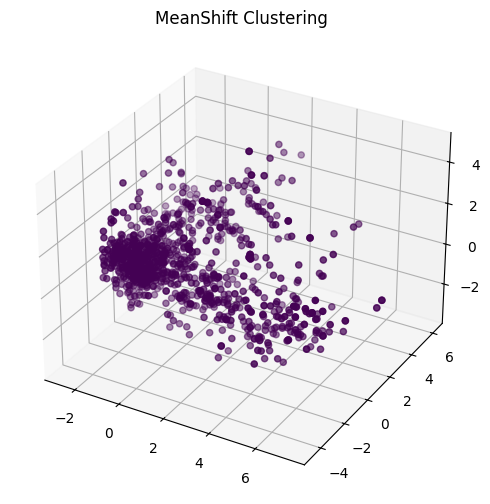

In [13]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_pca)

Z = linkage(X_pca, method='ward')
divisive_labels = fcluster(Z, t=n_clusters, criterion='maxclust')

kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_title('K-Means Clustering')
plt.show()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels, cmap='viridis')
ax.set_title('Hierarchical Clustering')
plt.show()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmed_labels, cmap='viridis')
ax.set_title('K-Median Clustering')
plt.show()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap='viridis')
ax.set_title('DBSCAN Clustering')
plt.show()

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=mean_shift_labels, cmap='viridis')
ax.set_title('MeanShift Clustering')
plt.show()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=divisive_labels, cmap='viridis')
ax.set_title('Divisive Clustering')
plt.show()

df['KMeans_Cluster'] = kmeans_labels
df['Agg_Cluster'] = agg_labels
df['KMed_Cluster'] = kmed_labels
df['DBSCAN_Cluster'] = dbscan_labels
df['MeanShift_Cluster'] = mean_shift_labels
df['Divisive_Cluster'] = divisive_labels


In [14]:

df['KMeans_Cluster'] = kmeans_labels
df['Agg_Cluster'] = agg_labels
df['KMed_Cluster'] = kmed_labels
df['DBSCAN_Cluster'] = dbscan_labels
df['MeanShift_Cluster'] = mean_shift_labels
df['Divisive_Cluster'] = divisive_labels

print(df.head())


                              App        Genres Current Ver  \
0            Garden Coloring Book  Art & Design       2.9.2   
1  Tattoo Name On My Photo Editor  Art & Design         3.8   
2           Mandala Coloring Book  Art & Design       1.0.4   
3           Mandala Coloring Book  Art & Design       1.0.4   
4           Mandala Coloring Book  Art & Design       1.0.4   

                                    App Id  Rating Count  Minimum Installs  \
0              com.eyewind.colorfit.garden       16599.0         1000000.0   
1  com.fashion.tattoo.name.my.photo.editor       50147.0        10000000.0   
2           com.artiomapps.mandalacoloring          16.0            5000.0   
3             com.eyewind.colorfit.mandala       76890.0        10000000.0   
4          com.piupiuapps.coloringmandala3        4200.0          500000.0   

  Currency  Minimum Android     Developer Id   Released  ... Avarage Rating  \
0      USD              4.1         Colorfit   1-Apr-16  ...       1.7130

# Classification

In [15]:

# Load the dataset (assuming it's already preprocessed and encoded)
df = pd.read_csv('processed_dataset.csv')

# One-hot encode the 'Genre' column
df_encoded = pd.get_dummies(df, columns=['Genres'])

# Define features and target
features = ['Reviews_normalized', 'Installs_normalized', 'trend'] + list(df_encoded.columns[df_encoded.columns.str.startswith('Genre_')])
target = 'Rating Category'  # Replace with actual target column name

# Split data into training and testing sets
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression':LogisticRegression(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("------------------------------------")


Model: Naive Bayes
Accuracy: 0.8428571428571429
Precision: 0.7104081632653061
Recall: 0.8428571428571429
F1-Score: 0.7709856035437431
------------------------------------


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
Accuracy: 0.825
Precision: 0.7933333333333333
Recall: 0.825
F1-Score: 0.8042917441482924
------------------------------------
Model: Decision Tree
Accuracy: 0.8035714285714286
Precision: 0.7943474229781283
Recall: 0.8035714285714286
F1-Score: 0.7986844051858828
------------------------------------
Model: SVM
Accuracy: 0.8428571428571429
Precision: 0.7104081632653061
Recall: 0.8428571428571429
F1-Score: 0.7709856035437431
------------------------------------
Model: LogisticRegression
Accuracy: 0.8428571428571429
Precision: 0.7104081632653061
Recall: 0.8428571428571429
F1-Score: 0.7709856035437431
------------------------------------


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance for KMeans clustering:
                          Feature  Importance
7354         Install Range_1M-10M    0.069319
1                Minimum Installs    0.066396
14    Minimum Installs_normalized    0.045283
17            Installs_normalized    0.039386
8                         Reviews    0.030143
10                       Installs    0.029960
13        Rating Count_normalized    0.029171
0                    Rating Count    0.026005
18            Reviews Per Install    0.021806
15             Reviews_normalized    0.019960


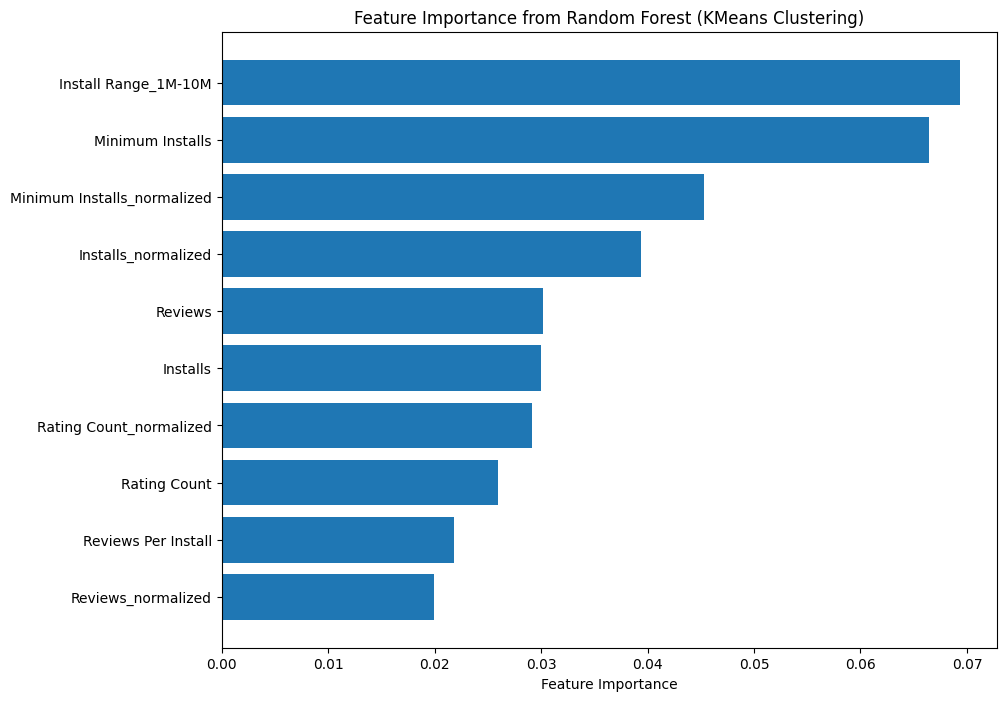

Feature importance for Agglomerative clustering:
                          Feature  Importance
17            Installs_normalized    0.072969
7354         Install Range_1M-10M    0.066656
10                       Installs    0.056044
1                Minimum Installs    0.054581
8                         Reviews    0.033276
14    Minimum Installs_normalized    0.029986
15             Reviews_normalized    0.026772
0                    Rating Count    0.021818
13        Rating Count_normalized    0.021677
7352        Install Range_100k-1M    0.014147


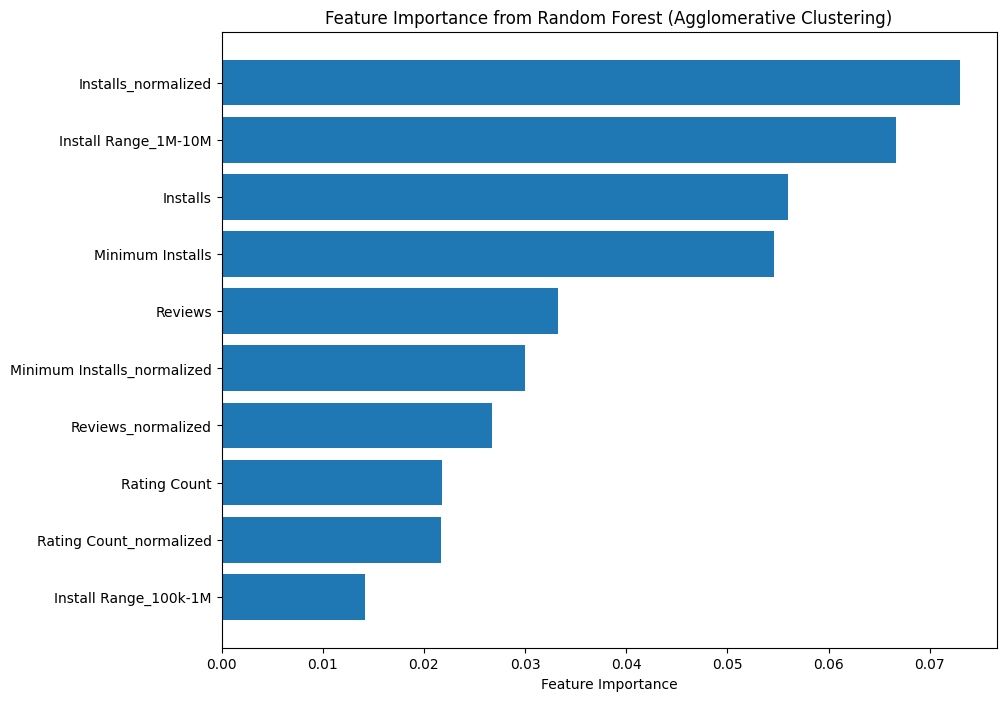

Feature importance for KMedian clustering:
                          Feature  Importance
7354         Install Range_1M-10M    0.064031
1                Minimum Installs    0.053105
17            Installs_normalized    0.050443
14    Minimum Installs_normalized    0.043459
10                       Installs    0.043018
13        Rating Count_normalized    0.029612
8                         Reviews    0.027325
15             Reviews_normalized    0.025172
7352        Install Range_100k-1M    0.015037
0                    Rating Count    0.014003


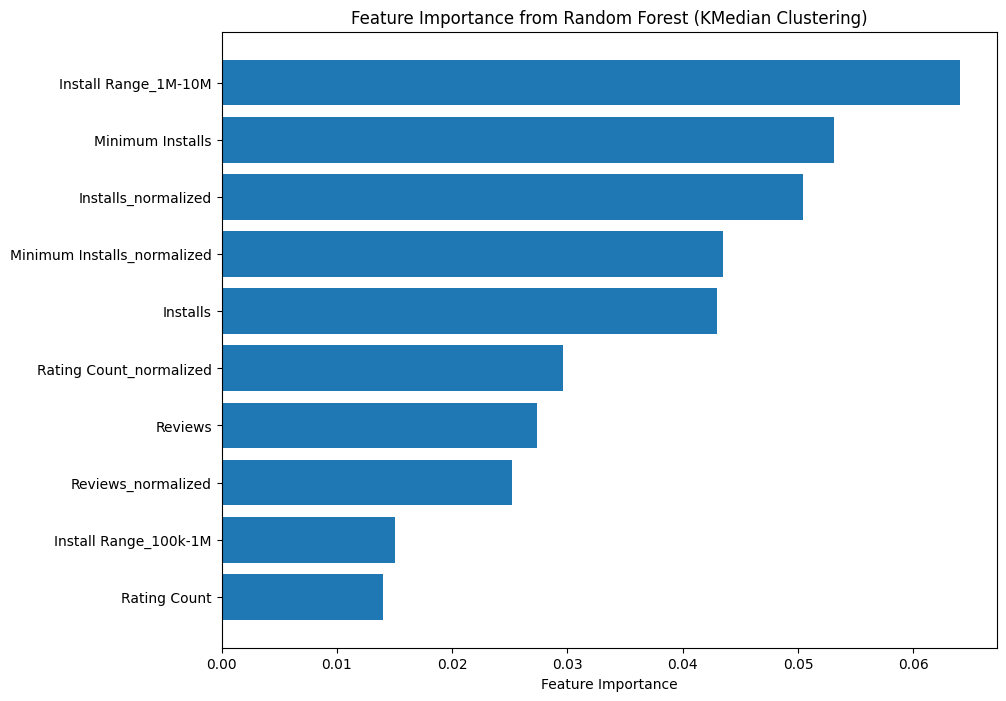

Model: Naive Bayes
Accuracy: 0.7178571428571429
Precision: 0.7303992378589153
Recall: 0.7178571428571429
F1-Score: 0.7173711551606288
------------------------------------
Model: Random Forest
Accuracy: 0.7642857142857142
Precision: 0.7911927623474319
Recall: 0.7642857142857142
F1-Score: 0.754291755739381
------------------------------------
Model: Decision Tree
Accuracy: 0.7642857142857142
Precision: 0.7651025785808394
Recall: 0.7642857142857142
F1-Score: 0.7627449381910889
------------------------------------
Model: SVM
Accuracy: 0.7535714285714286
Precision: 0.7802242811389153
Recall: 0.7535714285714286
F1-Score: 0.7427189202926244
------------------------------------
Model: Logistic Regression
Accuracy: 0.7642857142857142
Precision: 0.770387565919901
Recall: 0.7642857142857142
F1-Score: 0.7604199207016702
------------------------------------


In [20]:
df = pd.read_csv('processed_dataset.csv')

df_encoded = pd.get_dummies(df)

for column in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = df_encoded[column].mean()
    df_encoded[column] = (df_encoded[column] > mean_value).astype(int)
X = df_encoded

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_pca)

def k_median_clustering(X, n_clusters, max_iter=300):
    np.random.seed(42)
    initial_medoids_idx = np.random.choice(len(X), n_clusters, replace=False)
    medoids = X[initial_medoids_idx]

    for _ in range(max_iter):
        distances = cdist(X, medoids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        new_medoids = np.array([np.median(X[labels == i], axis=0) for i in range(n_clusters)])

        if np.all(new_medoids == medoids):
            break
        medoids = new_medoids

    return labels

kmed_labels = k_median_clustering(X_pca, n_clusters=3)

def feature_importance_analysis(X, labels, cluster_name, feature_names):
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    importances = clf.feature_importances_

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Feature importance for {cluster_name} clustering:")
    print(feature_importance_df.head(10))  # Display top 10 features

    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10))
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance from Random Forest ({cluster_name} Clustering)')
    plt.gca().invert_yaxis()
    plt.show()

feature_names = X.columns
feature_importance_analysis(X_scaled, kmeans_labels, 'KMeans', feature_names)
feature_importance_analysis(X_scaled, agg_labels, 'Agglomerative', feature_names)
feature_importance_analysis(X_scaled, kmed_labels, 'KMedian', feature_names)

target_column = 'Rating'  
def get_features_and_target(df_encoded, target_column):
    features = df_encoded.drop(columns=[target_column])
    target = df_encoded[target_column]
    return features, target

X, y = get_features_and_target(df_encoded, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("------------------------------------")